In [ ]:
from google.colab import files

uploaded = files.upload()


Saving E-Commerce Data.csv to E-Commerce Data.csv


In [ ]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
df = pd.read_csv('/content/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()  # Drop missing values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features (you may need to select appropriate features and preprocess them)
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Encode categorical variables
le = LabelEncoder()
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])

# Define a binary target variable (Example: Large transaction if Quantity > 50)
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import time
import psutil
from sklearn.tree import DecisionTreeClassifier

# Record the start time and CPU + RAM usage
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)
ram_start = psutil.virtual_memory().used / (1024**3)  # in GB

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Handle unseen labels using 'handle_unknown='ignore''
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col].map(lambda s: s if s in le.classes_ else -1)) # Handle unseen labels

dt.fit(X_train, y_train)

# Record the end time and CPU + RAM usage
cpu_end = psutil.cpu_percent(interval=None)
ram_end = psutil.virtual_memory().used / (1024**3)  # in GB
end_time = time.time()

# Calculate the training time and resource usage
training_time = end_time - start_time
cpu_usage = cpu_end - cpu_start
ram_usage = ram_end - ram_start

print(f"Training time: {training_time} seconds")
print(f"CPU usage: {cpu_usage}%")
print(f"RAM usage: {ram_usage} GB")

Training time: 8.90088152885437 seconds
CPU usage: 59.00000000000001%
RAM usage: 0.10676956176757812 GB


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


Training scores mean: [1.         0.99996927 0.99997952 0.99997696 0.99997849 0.99997696
 0.99996489 0.99996543 0.99996586 0.99995852]
Cross-validation scores mean: [0.96953878 0.97340711 0.97517075 0.97746902 0.97856899 0.97938629
 0.98044939 0.98109462 0.98177058 0.98213622]


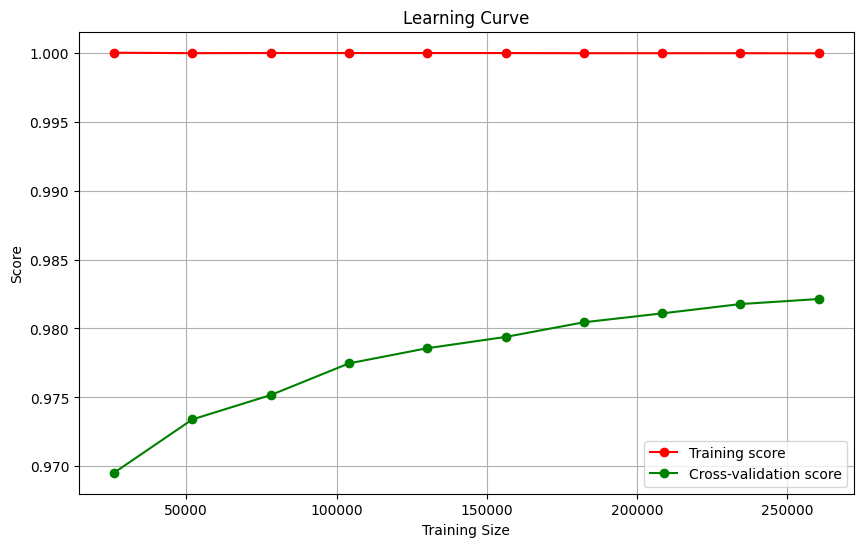

In [ ]:
import time
import psutil
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load and preprocess the data (make sure you've uploaded the file)
df = pd.read_csv('/content/drive/MyDrive/445 datasets/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Encode categorical variables
le = LabelEncoder()
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])

# Define a binary target variable
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle unseen labels using a more robust approach (e.g., using a default value)
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        # Handle unseen labels in the test set with a default value
        X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Generate the learning curve with error handling
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    error_score='raise'  # Raise errors instead of returning NaN
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Print scores for debugging
print("Training scores mean:", train_scores_mean)
print("Cross-validation scores mean:", test_scores_mean)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Adjust y-axis limits if needed (uncomment and modify if necessary)
# plt.ylim([0.8, 1.0])

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

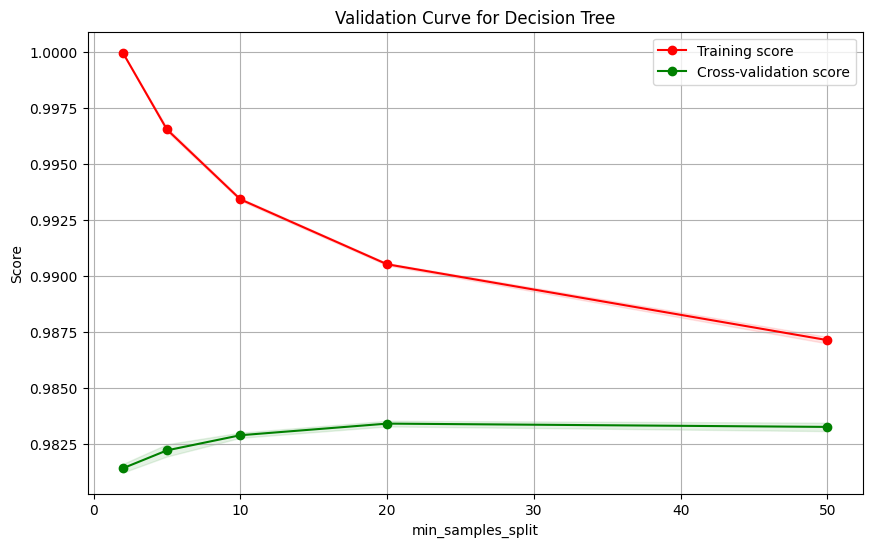

In [ ]:
from sklearn.model_selection import validation_curve

# Example: Effect of `min_samples_split` regularization parameter
param_range = [2, 5, 10, 20, 50]
train_scores, test_scores = validation_curve(dt, X_train, y_train, param_name="min_samples_split", param_range=param_range, cv=3, n_jobs=-1)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Validation Curve for Decision Tree')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.savefig('Validation_Curve_min_samples_split_Decision_Tree.png')
plt.show()


Training scores mean: [1.         0.99996927 0.99997952 0.99997696 0.99997849 0.99997696
 0.99996489 0.99996543 0.99996586 0.99995852]
Cross-validation scores mean: [0.96953878 0.97340711 0.97517075 0.97746902 0.97856899 0.97938629
 0.98044939 0.98109462 0.98177058 0.98213622]


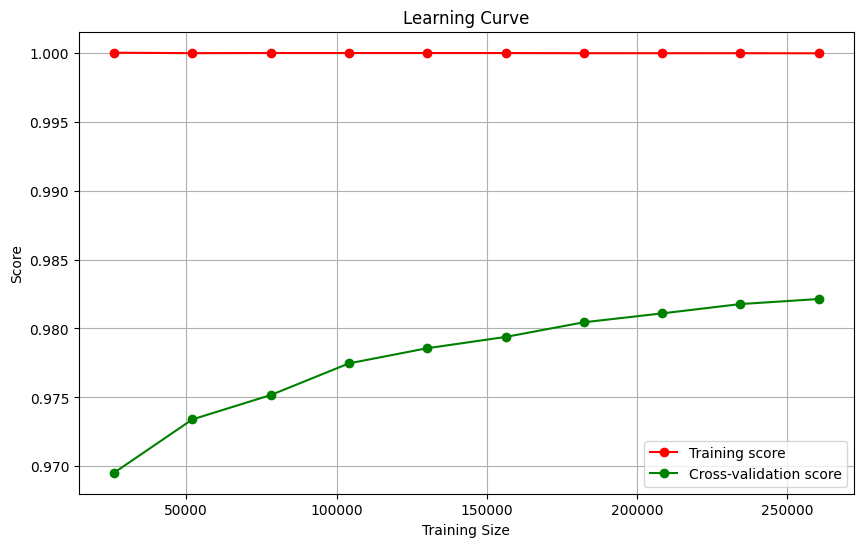

Accuracy: 0.9827
Precision: 0.6920
Recall: 0.6902
F1 Score: 0.6911
ROC AUC: 0.8406


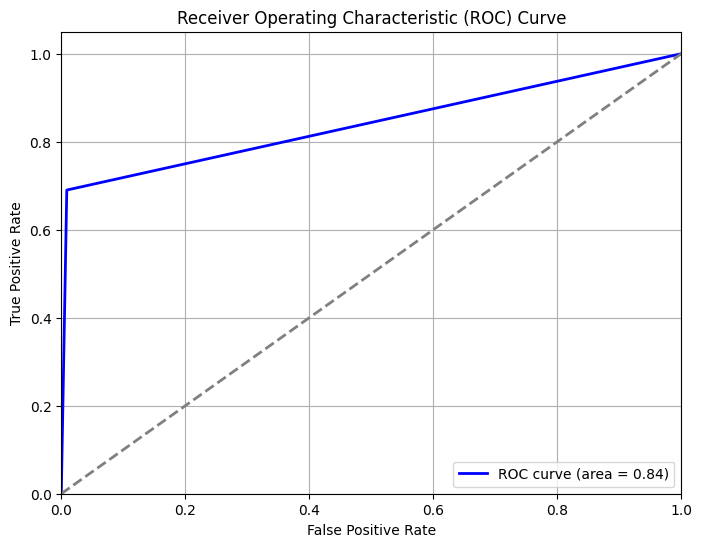

In [ ]:
import time
import psutil
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load and preprocess the data (make sure you've uploaded the file)
df = pd.read_csv('/content/E-Commerce Data.csv', encoding='latin-1')
df = df.dropna()

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Encode categorical variables
le = LabelEncoder()
df['StockCode'] = le.fit_transform(df['StockCode'])
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])

# Define a binary target variable
df['LargeTransaction'] = (df['Quantity'] > 50).astype(int)

# Define features and target variable
X = df.drop(['Quantity', 'InvoiceDate', 'LargeTransaction'], axis=1)
y = df['LargeTransaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle unseen labels using a more robust approach (e.g., using a default value)
le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        # Handle unseen labels in the test set with a default value
        X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train) # Train the model before making predictions

# Generate the learning curve with error handling
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    error_score='raise'  # Raise errors instead of returning NaN
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Print scores for debugging
print("Training scores mean:", train_scores_mean)
print("Cross-validation scores mean:", test_scores_mean)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Adjust y-axis limits if needed (uncomment and modify if necessary)
# plt.ylim([0.8, 1.0])

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

# Now you can continue with making predictions and evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
